# Restricted Brownian motion

In [1]:
# Libraries ----
import re
import sys
import warnings
import numpy as np # type: ignore
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore

sys.path.append('../modules')
import eda_brownian_motion as edabm # type: ignore
import estimate_stochastic_process as esp # type: ignore

# Global options ----
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)

## Global variables

In [2]:
input_path_raw = "../input_files/raw_data"
input_path_processed = "../input_files/processed_data"
input_path_data_dictionary = "../input_files/data_dictionary"
log_path = "../logs"
output_path = "../output_files"
input_generation_date = "2024-08-14"

## Brownian motion simulations

In [3]:
mu = 0 # Stochastic drift
sigma = 0.2 # Diffusion coefficient
x0 = 0 # Initial value
t0 = 0 # Initial time
tf = 10 # Last time
n_steps = 11 # Number of steps per simulation
n_samples = 20 # Number of simulations

In [4]:
# Brownian motion arguments list sampling ----
bm_args_list = pd.DataFrame(
    {
        "x0" : np.repeat(x0, n_samples),
        "t0" : np.repeat(t0, n_samples),
        "tf" : np.repeat(tf, n_samples),
        "n_steps" : np.repeat(n_steps, n_samples),
        "n_samples" : np.arange(1, n_samples + 1, 1)
    }
)
bm_args_list = bm_args_list.values.tolist()


In [5]:
# Simulate multiple Brownian motion paths
df_bm = esp.simulate_brownian_motion(
    mu = mu,
    sigma = sigma,
    threshold = 0,
    threshold_flag = False,
    geometric_flag = False,
    bm_args_list = bm_args_list,
    log_path = log_path,
    log_filename = "log_bm",
    verbose = 1,
    tqdm_bar = True
)
df_bm

100%|███████████████████████| 20/20 [00:02<00:00,  9.26it/s]


,simulation,restricted,time,value
0,1,False,0.0,0.000000
1,1,False,1.0,0.146029
2,1,False,2.0,0.122191
3,1,False,3.0,0.051616
4,1,False,4.0,0.010321
...,...,...,...,...
6,20,False,6.0,-0.454506
7,20,False,7.0,-0.444670
8,20,False,8.0,-0.529925
9,20,False,9.0,-0.579873


## Brownian motion with threshold

In [6]:
mu = 1 * 10**-1 # Stochastic drift
sigma = 3 * 10**0 # Diffusion coefficient
threshold = 1 * 10**0 # Threshold value
x0 = 2 * 10**0 # Initial value
t0 = 0 * 10**0 # Initial time
tf = 1 * 10**2 # Last time
n_steps = 5 * 10 ** 3 + 1 # Number of steps per simulation
n_samples = 4 * 10 ** 4 # Number of simulations

In [7]:
# Restricted Brownian motion arguments list sampling ----
rbm_args_list = pd.DataFrame(
    {
        "x0" : np.repeat(x0, n_samples),
        "t0" : np.repeat(t0, n_samples),
        "tf" : np.repeat(tf, n_samples),
        "n_steps" : np.repeat(n_steps, n_samples),
        "n_samples" : np.arange(1, n_samples + 1, 1)
    }
)
rbm_args_list = rbm_args_list.values.tolist()


In [8]:
# Simulate multiple of restricted Brownian motion paths
df_rbm = esp.simulate_brownian_motion(
    mu = mu,
    sigma = sigma,
    threshold = threshold,
    threshold_flag = True,
    geometric_flag = False,
    bm_args_list = rbm_args_list,
    log_path = log_path,
    log_filename = "log_rbm",
    verbose = 1,
    tqdm_bar = True
)
df_rbm

100%|████████████████| 40000/40000 [00:48<00:00, 823.01it/s]


,simulation,restricted,time,value
0,1,True,0.00,2.000000
1,1,True,0.02,1.681333
2,1,True,0.04,1.854390
3,1,True,0.06,2.076957
4,1,True,0.08,2.432121
...,...,...,...,...
4996,40000,True,99.92,37.725662
4997,40000,True,99.94,38.395686
4998,40000,True,99.96,38.301058
4999,40000,True,99.98,38.255223


# Exploratory Data Analysis

In [9]:
df_fit_rbm = edabm.plot_entropy_brownian_motion(
    df_bm = df_rbm,
    mu = mu,
    sigma = sigma,
    x0 = x0,
    t0 = t0,
    x_threshold = threshold,
    n_steps = n_steps,
    p = 1,
    ma_window = 10,
    p_norm = 1,
    significant_figures = 3,
    width = 17,
    height = 8,
    fontsize_labels = 15,
    fontsize_legend = 13,
    n_cols = 1,
    n_x_breaks = 20,
    n_y_breaks = 20,
    fancy_legend = True,
    usetex = True,
    dpi = 150,
    save_figures = True,
    output_path = output_path,
    information_name = "rbm",
    input_generation_date = input_generation_date
)

df_fit_rbm = df_fit_rbm.drop_duplicates().to_csv(
    "{}/df_entropy_rbm_{}.csv".format(output_path, re.sub("-", "", input_generation_date)),
    index = False
)

In [10]:
print("mu   ", mu)
print("sigma", sigma)
print("x0   ", x0)
print("t0   ", t0)
print("dt   ", tf/(n_steps-1))
print("xV   ", threshold)

mu    0.1
sigma 3
x0    2
t0    0
dt    0.02
xV    1


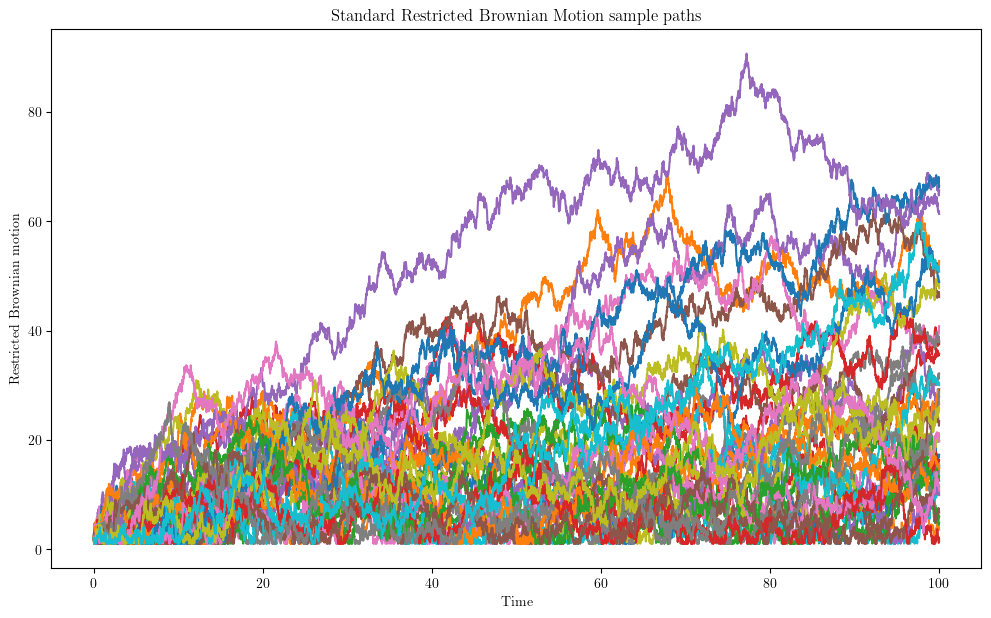

In [11]:
# Restricted Brownian motion samples ----
fig_2, ax_2 = plt.subplots(1, 1, figsize = (12, 7))

for path in range(0, 40):
    df_aux = df_rbm[df_rbm["simulation"] == path]
    ax_2.plot(
        df_aux["time"],
        df_aux["value"],
        alpha = 1,
        zorder = 2,
        marker = "",
        linestyle = "-",
        markersize = 1
    )
ax_2.set_title("Standard Restricted Brownian Motion sample paths")
ax_2.set_xlabel("Time")
ax_2.set_ylabel("Restricted Brownian motion")
plt.show()